## <font color=red> Problem Statement

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

## <font color=red> Importing necessary libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display max rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# class to apply different formatting styles while printing
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## <font color=red> Import and Read Dataset

In [4]:
# load data
churn = pd.read_csv('train.csv')
unseen = pd.read_csv('test.csv')

In [5]:
# display top 5 rows 
churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [6]:
# check the shape
print(churn.shape)
print(unseen.shape)

(69999, 172)
(30000, 171)


In [7]:
# checking for info
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [8]:
# statistical analysis
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

## <font color=red> Data Cleaning and Preprocessing

### <font color=blue>Removing unwanted columns

In [9]:
# check number of unique values for all columns
uniq = churn.nunique()
uniq

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

- As can be seen, there are few columns which have only 1 type of value
- We will remove such columns

In [10]:
# columns having only 1 type of value
cols_drop = uniq[uniq==1].index

# dropping from churn dataset
churn.drop(columns=cols_drop, inplace=True)
# dropping from unseen dataset
unseen.drop(columns=cols_drop, inplace=True)

In [11]:
# check the shape
print(churn.shape)
print(unseen.shape)

(69999, 159)
(30000, 158)


### <font color=blue>Handling Missing Values

In [12]:
# defining a func to calculate NULL value percentage
def null_calc(df):
    null_df = df.isnull().sum()*100/len(df)
    return null_df

In [13]:
# checking NULL value percentage column wise
null_perc = null_calc(churn)
null_perc

id                           0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_6             3.954342
loc_og_t2c_m

In [14]:
# columns having NULL values
cols_null = null_perc[null_perc>0].index
print(cols_null)
print(len(cols_null))

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=114)
114


**Numerical Columns**

In [15]:
# statistical description of columns with NULL values
churn[cols_null].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
count,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,48.043255,47.882736,47.256388,107.152439,106.489856,108.154731,12.050672,12.563665,11.716763,167.255126,166.945103,167.136761,9.476958,9.873468,9.910217,20.734858,21.685359,21.089042,2.146273,2.199395,2.075179,32.360632,33.760809,33.077030,0.061932,0.033371,0.040392,7.394167,8.171162,8.348424,0.854063,1.019680,0.963214,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,192.831096,201.455940,196.815792,90.069931,89.115767,90.618564,86.863900,85.84

In [16]:
print('NULL values of total_rech_data_6:', churn.total_rech_data_6.isnull().sum())
print('NULL values of date_of_last_rech_data_6:', churn.date_of_last_rech_data_6.isnull().sum())
print('NULL values together:', churn[(churn.total_rech_data_6.isnull()) & (churn.date_of_last_rech_data_6.isnull())].shape[0])
churn[['total_rech_data_6','date_of_last_rech_data_6']][(churn.total_rech_data_6.isnull()) & (churn.date_of_last_rech_data_6.isnull())].head()

NULL values of total_rech_data_6: 52431
NULL values of date_of_last_rech_data_6: 52431
NULL values together: 52431


,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN


- There are some `recharge` columns which have minimum value as 1
- For such columns, if we check correspoding `date` column, we see both have same missing values
- For such columns NULL value means that customer did not recharge
- We can impute missing values with 0

In [17]:
# 'recharge' columns where NULL values to be imputed with 0
cols_impute_0 = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

# imputing NULL with 0 for churn
churn[cols_impute_0] = churn[cols_impute_0].fillna(0)
# imputing NULL with 0 for unseen
unseen[cols_impute_0] = unseen[cols_impute_0].fillna(0)

In [18]:
# checking if NULL values have been filled
churn[cols_impute_0].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

In [19]:
# dropping imputed columns from our list of columns with NULL values
cols_null = cols_null.drop(cols_impute_0)
len(cols_null)

105

**Categorical Columns**

In [20]:
# checking NULL value percentages again
null_perc = null_calc(churn[cols_null])
null_perc

onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_6             3.954342
loc_og_t2c_mou_7             3.838626
loc_og_t2c_mou_8             5.290076
loc_og_mou_6                 3.954342
loc_og_mou_7                 3.838626
loc_og_mou_8

In [21]:
# checking unique value counts for columns with NULL values
uniq = churn[cols_null].nunique()
uniq

onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou_6             3376
loc_og_t2f_mou_7             3365
loc_og_t2f_mou_8             3311
loc_og_t2c_mou_6             1945
loc_og_t2c_mou_7             2103
loc_og_t2c_mou_8             2204
loc_og_mou_6                22309
loc_og_mou_7                22012
loc_og_mou_8                21950
std_og_t2t_mou_6            14554
std_og_t2t_mou_7            14745
std_og_t2t_mou

In [22]:
# value_counts for categorical coulmns having unique value count as 2
for i in uniq[uniq==2].index:
    print(churn[i].value_counts())
    print('='*50)

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64
0.0    17435
1.0      430
Name: night_pck_user_7, dtype: int64
0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64
1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64
1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64
1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64


- There are some numerical categorical columns for which unique value count is 2 ('0' and '1') 
- We can impute NULL values with '-1' for such columns

In [23]:
# categorical columns where NULL values to be imputed with '-1'
cols_impute_1 = uniq[uniq==2].index

# imputing NULL with -1 for churn
churn[cols_impute_1] = churn[cols_impute_1].fillna(-1)
# imputing NULL with -1 for unseen
unseen[cols_impute_1] = unseen[cols_impute_1].fillna(-1)

In [24]:
# checking if NULL values have been filled
churn[cols_impute_1].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
dtype: int64

- For columns `date_of_last_rech_6`, `date_of_last_rech_7`, `date_of_last_rech_8` we will impute missing values with mode

In [25]:
# imputing missing values with mode
for i in ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']:
    churn[i].fillna(churn[i].mode()[0], inplace=True)
    unseen[i].fillna(unseen[i].mode()[0], inplace=True)

In [26]:
# checking if NULL values have been filled
churn[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].isnull().sum()

date_of_last_rech_6    0
date_of_last_rech_7    0
date_of_last_rech_8    0
dtype: int64

In [27]:
# dropping imputed columns from our list of columns with NULL values
cols_null = cols_null.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'])
len(cols_null)

102

**Dropping columns having NULL values above a threshold**

In [28]:
# checking NULL value percentages again
null_perc = null_calc(churn[cols_null])
null_perc

onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_6             3.954342
loc_og_t2c_mou_7             3.838626
loc_og_t2c_mou_8             5.290076
loc_og_mou_6                 3.954342
loc_og_mou_7                 3.838626
loc_og_mou_8

- Will drop columns having more than 70% NULL values

In [29]:
# columns having more than 70% NULL values
null_70 = null_perc[null_perc>70].index

# from churn data
churn.drop(columns=null_70, inplace=True)
# from unseen data
unseen.drop(columns=null_70, inplace=True)

In [30]:
# check the shape
print(churn.shape)
print(unseen.shape)

(69999, 144)
(30000, 143)


In [31]:
# dropping imputed columns from our list of columns with NULL values
cols_null = cols_null.drop(null_70)
len(cols_null)

87

**Missing value imputations using MICE**

In [32]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = churn[cols_null]

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

# for churn dataset
churn[cols_null] = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=churn[cols_null].columns)

# for unseen dataset
unseen[cols_null] = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=unseen[cols_null].columns)

In [33]:
# checking if NULL values have been filled
null_calc(churn)

id                     0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
s

### <font color=blue>Filter High Value Customers

In [34]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_amt_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_amt_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['total_rech_6'] = churn.total_rech_amt_6 + churn.total_data_rech_amt_6
churn['total_rech_7'] = churn.total_rech_amt_7 + churn.total_data_rech_amt_7

# calculate average recharge done by customer in June and July
churn['avg_rech_6_7'] = (churn.total_rech_6 + churn.total_rech_7)/2

In [35]:
# check the 70th percentile of this column
churn['avg_rech_6_7'].quantile(0.7)

477.5

- We will retain only those customers whose recharge amount is greater than or equal to 70th percentile

In [36]:
# filtering churn data
churn_filter = churn[churn['avg_rech_6_7']>=churn['avg_rech_6_7'].quantile(0.7)]
churn_filter.reset_index(drop=True)
churn_filter.shape

(21013, 149)

In [37]:
# deleting variables created to filter high value customers
churn_filter = churn_filter.drop(columns=['total_data_rech_amt_6','total_data_rech_amt_7',
                                         'total_rech_6','total_rech_7','avg_rech_6_7'])
churn_filter.shape

(21013, 144)

### <font color=blue>Feature Engineering

- The most important feature, in this situation, can be the difference between the 8th month and the previous months. 
- The difference can be in patterns such as usage difference or recharge value difference. 
- Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [38]:
# Calculate difference between 8th and previous months
for i in ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_mou','std_og_mou','isd_og_mou','spl_og_mou',
         'total_og_mou','loc_ic_mou','std_ic_mou','isd_ic_mou','spl_ic_mou','total_ic_mou','total_rech_num','total_rech_amt',
         'max_rech_amt','total_rech_data','max_rech_data','av_rech_amt_data','vol_2g_mb','vol_3g_mb']:
    churn_filter[f'{i}_diff'] = churn_filter[f'{i}_8'] - (churn_filter[f'{i}_6']+churn_filter[f'{i}_7'])/2
    unseen[f'{i}_diff'] = unseen[f'{i}_8'] - (unseen[f'{i}_6']+unseen[f'{i}_7'])/2

In [39]:
churn_filter.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,-82.8845,-6.925,-37.920,-26.82,-7.865,-26.665,-2.175,0.0,-8.500,-37.340,12.860,0.000,0.0,0.000,12.860,-3.5,-91.0,-15.5,-1.0,-8.0,-41.0,-136.375,0.00
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,6/27/2014,7/25/2014,8/30/2014,0,150,250,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,

### <font color=blue>Seperating numerical, categorical and datetime columns

In [40]:
churn_filter.nunique()

id                       21013
arpu_6                   20467
arpu_7                   20475
arpu_8                   19789
onnet_mou_6              13313
onnet_mou_7              13346
onnet_mou_8              12964
offnet_mou_6             16323
offnet_mou_7             16355
offnet_mou_8             15990
roam_ic_mou_6             3359
roam_ic_mou_7             2837
roam_ic_mou_8             3248
roam_og_mou_6             3784
roam_og_mou_7             3187
roam_og_mou_8             3652
loc_og_t2t_mou_6          8734
loc_og_t2t_mou_7          8697
loc_og_t2t_mou_8          8833
loc_og_t2m_mou_6         12625
loc_og_t2m_mou_7         12588
loc_og_t2m_mou_8         12632
loc_og_t2f_mou_6          2832
loc_og_t2f_mou_7          2841
loc_og_t2f_mou_8          3174
loc_og_t2c_mou_6          1657
loc_og_t2c_mou_7          1699
loc_og_t2c_mou_8          2099
loc_og_mou_6             14405
loc_og_mou_7             14422
loc_og_mou_8             14179
std_og_t2t_mou_6          8616
std_og_t

In [41]:
# datetime cols
date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

# categorical columns
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

# numerical columns
num_cols = churn_filter.columns.drop(date_cols).drop(cat_cols).drop(['id','churn_probability'])

In [42]:
print(len(date_cols))
print(len(cat_cols))
print(len(num_cols))
print(churn_filter.shape)

3
6
156
(21013, 167)


In [43]:
# converting date columns to datetime datatype
for i in date_cols:
    churn_filter[i] = pd.to_datetime(churn_filter[i])
    unseen[i] = pd.to_datetime(unseen[i])

In [44]:
churn_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013 entries, 4 to 69997
Columns: 167 entries, id to vol_3g_mb_diff
dtypes: datetime64[ns](3), float64(137), int64(27)
memory usage: 26.9 MB


## <font color=red> Data Visualisation

0    92.0
1     8.0
Name: churn_probability, dtype: float64 3


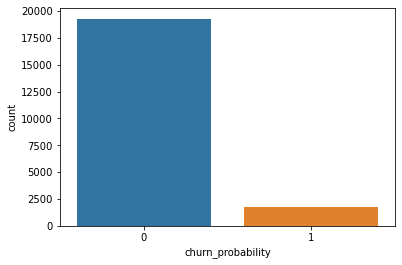

In [45]:
# churn rate
print(round(churn_filter.churn_probability.value_counts(normalize=True)*100),3)
sns.countplot(churn_filter.churn_probability)
plt.show()

- Class Imbalance is there in the dataset.

In [46]:
# Creating churn dataframe
data_churn = churn_filter[churn_filter['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = churn_filter[churn_filter['churn_probability'] == 0]

### <font color=blue> Univariate Analysis

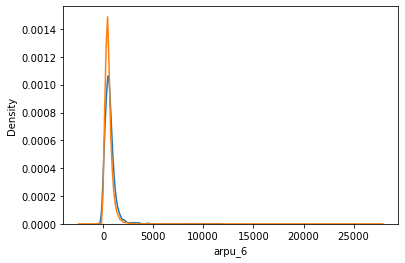

In [47]:
# Distribution plot
ax = sns.distplot(data_churn['arpu_6'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['arpu_6'],label='not churn',hist=False)
ax.set(xlabel='arpu_6')
plt.xticks()
plt.show()

- Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

- ARPU for the not churned customers is mostly densed on the 0 to 1000.

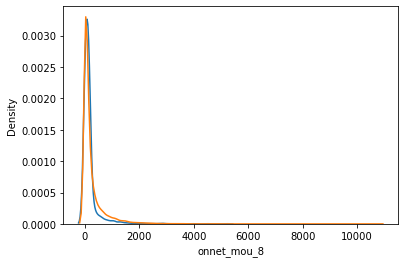

In [48]:
# Distribution plot
ax = sns.distplot(data_churn['onnet_mou_8'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['onnet_mou_8'],label='not churn',hist=False)
ax.set(xlabel='onnet_mou_8')
plt.xticks()
plt.show()

- onnet for the month of Aug is same for churn and non-churn customers 

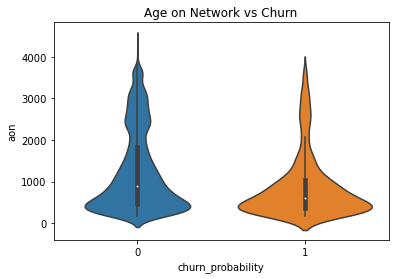

In [49]:
sns.violinplot(y='aon', x='churn_probability', data=churn_filter)
plt.title('Age on Network vs Churn')
plt.show()

- The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'

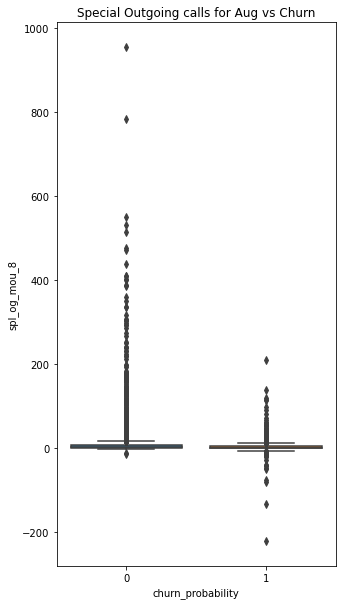

In [50]:
plt.figure(figsize=(5,10))
sns.boxplot(y='spl_og_mou_8', x='churn_probability', data=churn_filter)
plt.title('Special Outgoing calls for Aug vs Churn')
plt.show()

- Customers whose Special calls MOU is less are more likely to churn

### <font color=blue> Bivariate Analysis

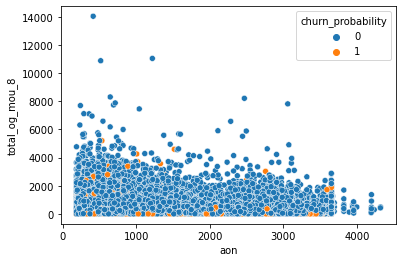

In [51]:
sns.scatterplot(data=churn_filter, x='aon',y='total_og_mou_8',hue='churn_probability')
plt.show()

- The customers with lesser total_og_mou_8 and aon are more likely to churn compared to the one with higher total_og_mou_8 and aon.

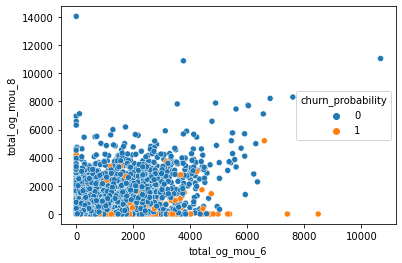

In [52]:
sns.scatterplot(data=churn_filter, x='total_og_mou_6',y='total_og_mou_8',hue='churn_probability')
plt.show()

- The customers with lower total_og_mou in 8th and higher in 6th month are more likely to Churn compared to the ones with higher total_og_mou.

### <font color=blue> Multivariate Analysis

In [53]:
# correlation table for all numeric columns
corr_df = churn_filter[num_cols].corr()
corr_df

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
arpu_6,1.000000,0.696079,0.629072,0.334851,0.214040,0.192268,0.495882,0.334800,0.282338,0.123489,0.075679,0.080017,0.200546,0.138532,0.116262,0.162651,0.126043,0.128445,0.313539,0.235259,0.208397,0.136044,0.113446,0.109340,0.044308,0.004409,-0.001318,0.311294,0.236375,0.218893,0.266624,0.160082,0.137293,0.283146,0.170680,0.130037,0.063791,0.047841,0.039849,0.369093,0.222595,0.178552,0.505893,0.488977,0.484459,0.112060,0.046518,0.023271,0.044225,0.002520,-0.001073,0.542076,0.358207,0.300064,0.076556,0.058551,0.058451,0.172000,0.141500,0.119450,0.045452,0.035977,0.036026,0.165210,0.133490,0.118215,0.088505,0.054234,0.052799,0.091802,0.063508,0.062878,0.033166,0.036130,0.026007,0.119577,0.079434,0.077005,0.216304,0.160430,0.142200,0.028045,-0.045928,-0.015856,0.108477,0.072775,0.085687,0.014094,0.044483,0.009525,0.343696,0.132652,0.120970,0.946338,0.675068,0.620148,0.313318,0.254446,0.270626,0.261653,0.227652,0.167822,-0.106612,-0.170388,-0.117853,0.072738,-0.022003,0.023405,0.102499,-0.029007,0.027297,-0.059308,-0.100555,-0.076614,0.143810,0.067871,0.082615,-0.036062,-0.083707,-0.061535,-0.155078,-0.188235,-0.147757,0.164988,0.072039,0.095688,0.001396,-0.019813,-0.011942,0.043376,0.056719,0.054875,0.108742,-0.244316,-0.131592,-0.194528,-0.030235,-0.070339,-0.114824,-0.176607,-0.055981,-0.055831,-0.210630,-0.061258,-0.036508,-0.013664,-0.007150,-0.082605,-0.168212,-0.185932,-0.033718,0.028465,-0.003729,-0.012241,0.007621,-0.033433
arpu_7,0.696079,1.000000,0.781639,0.207977,0.310807,0.262554,0.346815,0.477144,0.383970,0.090447,0.087052,0.083682,0.137871,0.174658,0.143228,0.105483,0.152301,0.131966,0.202731,0.287572,0.238462,0.114077,0.144918,0.124

In [54]:
# correlation table for the derived columns

corr_cols = ['arpu_diff','onnet_mou_diff','offnet_mou_diff','roam_ic_mou_diff','roam_og_mou_diff','loc_og_mou_diff','std_og_mou_diff',
'isd_og_mou_diff','spl_og_mou_diff','total_og_mou_diff','loc_ic_mou_diff','std_ic_mou_diff','isd_ic_mou_diff',
'spl_ic_mou_diff','total_ic_mou_diff','total_rech_num_diff','total_rech_amt_diff','max_rech_amt_diff',
'total_rech_data_diff','max_rech_data_diff','av_rech_amt_data_diff','vol_2g_mb_diff','vol_3g_mb_diff']

corr_df = churn_filter[corr_cols].corr()
corr_df

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
arpu_diff,1.000000,0.419276,0.540334,0.049263,0.140789,0.336303,0.540554,0.213917,0.014074,0.631499,0.180965,0.119143,0.041987,0.016145,0.248326,0.544437,0.855407,0.258272,0.181609,0.241934,0.327676,0.088228,0.248601
onnet_mou_diff,0.419276,1.000000,0.117926,-0.054070,0.016330,0.370171,0.629961,0.004363,0.074939,0.695437,0.110753,0.104884,0.007289,0.022561,0.141971,0.352280,0.384253,0.078431,0.017018,0.010696,0.010780,0.007824,0.001305
offnet_mou_diff,0.540334,0.117926,1.000000,-0.041142,0.018051,0.373550,0.703263,0.041171,0.109568,0.762584,0.188443,0.122996,0.021279,0.007506,0.217873,0.384551,0.501675,0.105671,0.012057,0.013367,0.016970,0.004303,0.018557
roam_ic_mou_diff,0.049263,-0.054070,-0.041142,1.000000,0.550457,-0.132484,-0.126343,-0.004972,-0.034819,-0.161697,-0.122358,-0.112624,-0.011827,-0.020239,-0.148474,-0.009486,0.042665,0.019958,-0.016495,-0.006446,-0.017823,0.006508,-0.021425
roam_og_mou_diff,0.140789,0.016330,0.018051,0.550457,1.000000,-0.105427,-0.139206,-0.005905,-0.031093,-0.161672,-0.105736,-0.069453,-0.013911,-0.025860,-0.117017,0.029785,0.125118,0.037963,-0.008762,-0.007721,-0.014882,0.010823,-0.019392
loc_og_mou_diff,0.336303,0.370171,0.373550,-0.132484,-0.105427,1.000000,0.103588,0.011306,0.046471,0.502203,0.326425,0.062309,0.015223,0.032666,0.290888,0.255068,0.312033,0.084234,0.001741,0.019697,0.017191,-0.012530,0.001833
std_og_mou_diff,0.540554,0.629961,0.703263,-0.126343,-0.139206,0.103588,1.000000,0.006525,0.090123,0.903621,0.094556,0.158831,0.020180,0.011448,0.160920,0.428168,0.499307,0.091331,0.020959,0.010123,0.015218,0.012359,0.017742
isd_og_mou_diff,0.213917,0.004363,0.041171,-0.004972,-0.005905,0.011306,0.006525,1.000000,0.015638,0.035694,0.019075,-0.009706,-0.063590,0.002507,-0.007772,0.069470,0.213405,0.058401,-0.000287,-0.009886,-0.003814,-0.003286,-0.000959
spl_og_mou_diff,0.014074,0.074939,0.109568,-0.034819,-0.031093,0.046471,0.090123,0.015638,1.000000,0.137865,0.060803,0.038437,0.002693,0.021650,0.071145,0.142758,0.015452,0.015948,0.056443,0.014906,0.026391,0.016359,0.037445
total_og_mou_diff,0.631499,0.695437,0.762584,-0.161697,-0.161672,0.502203,0.903621,0.035694,0.137865,1.000000,0.214652,0.162539,0.022951,0.023128,0.275734,0.498377,0.583290,0.131635,0.032602,0.026547,0.030792,0.011593,0.025072


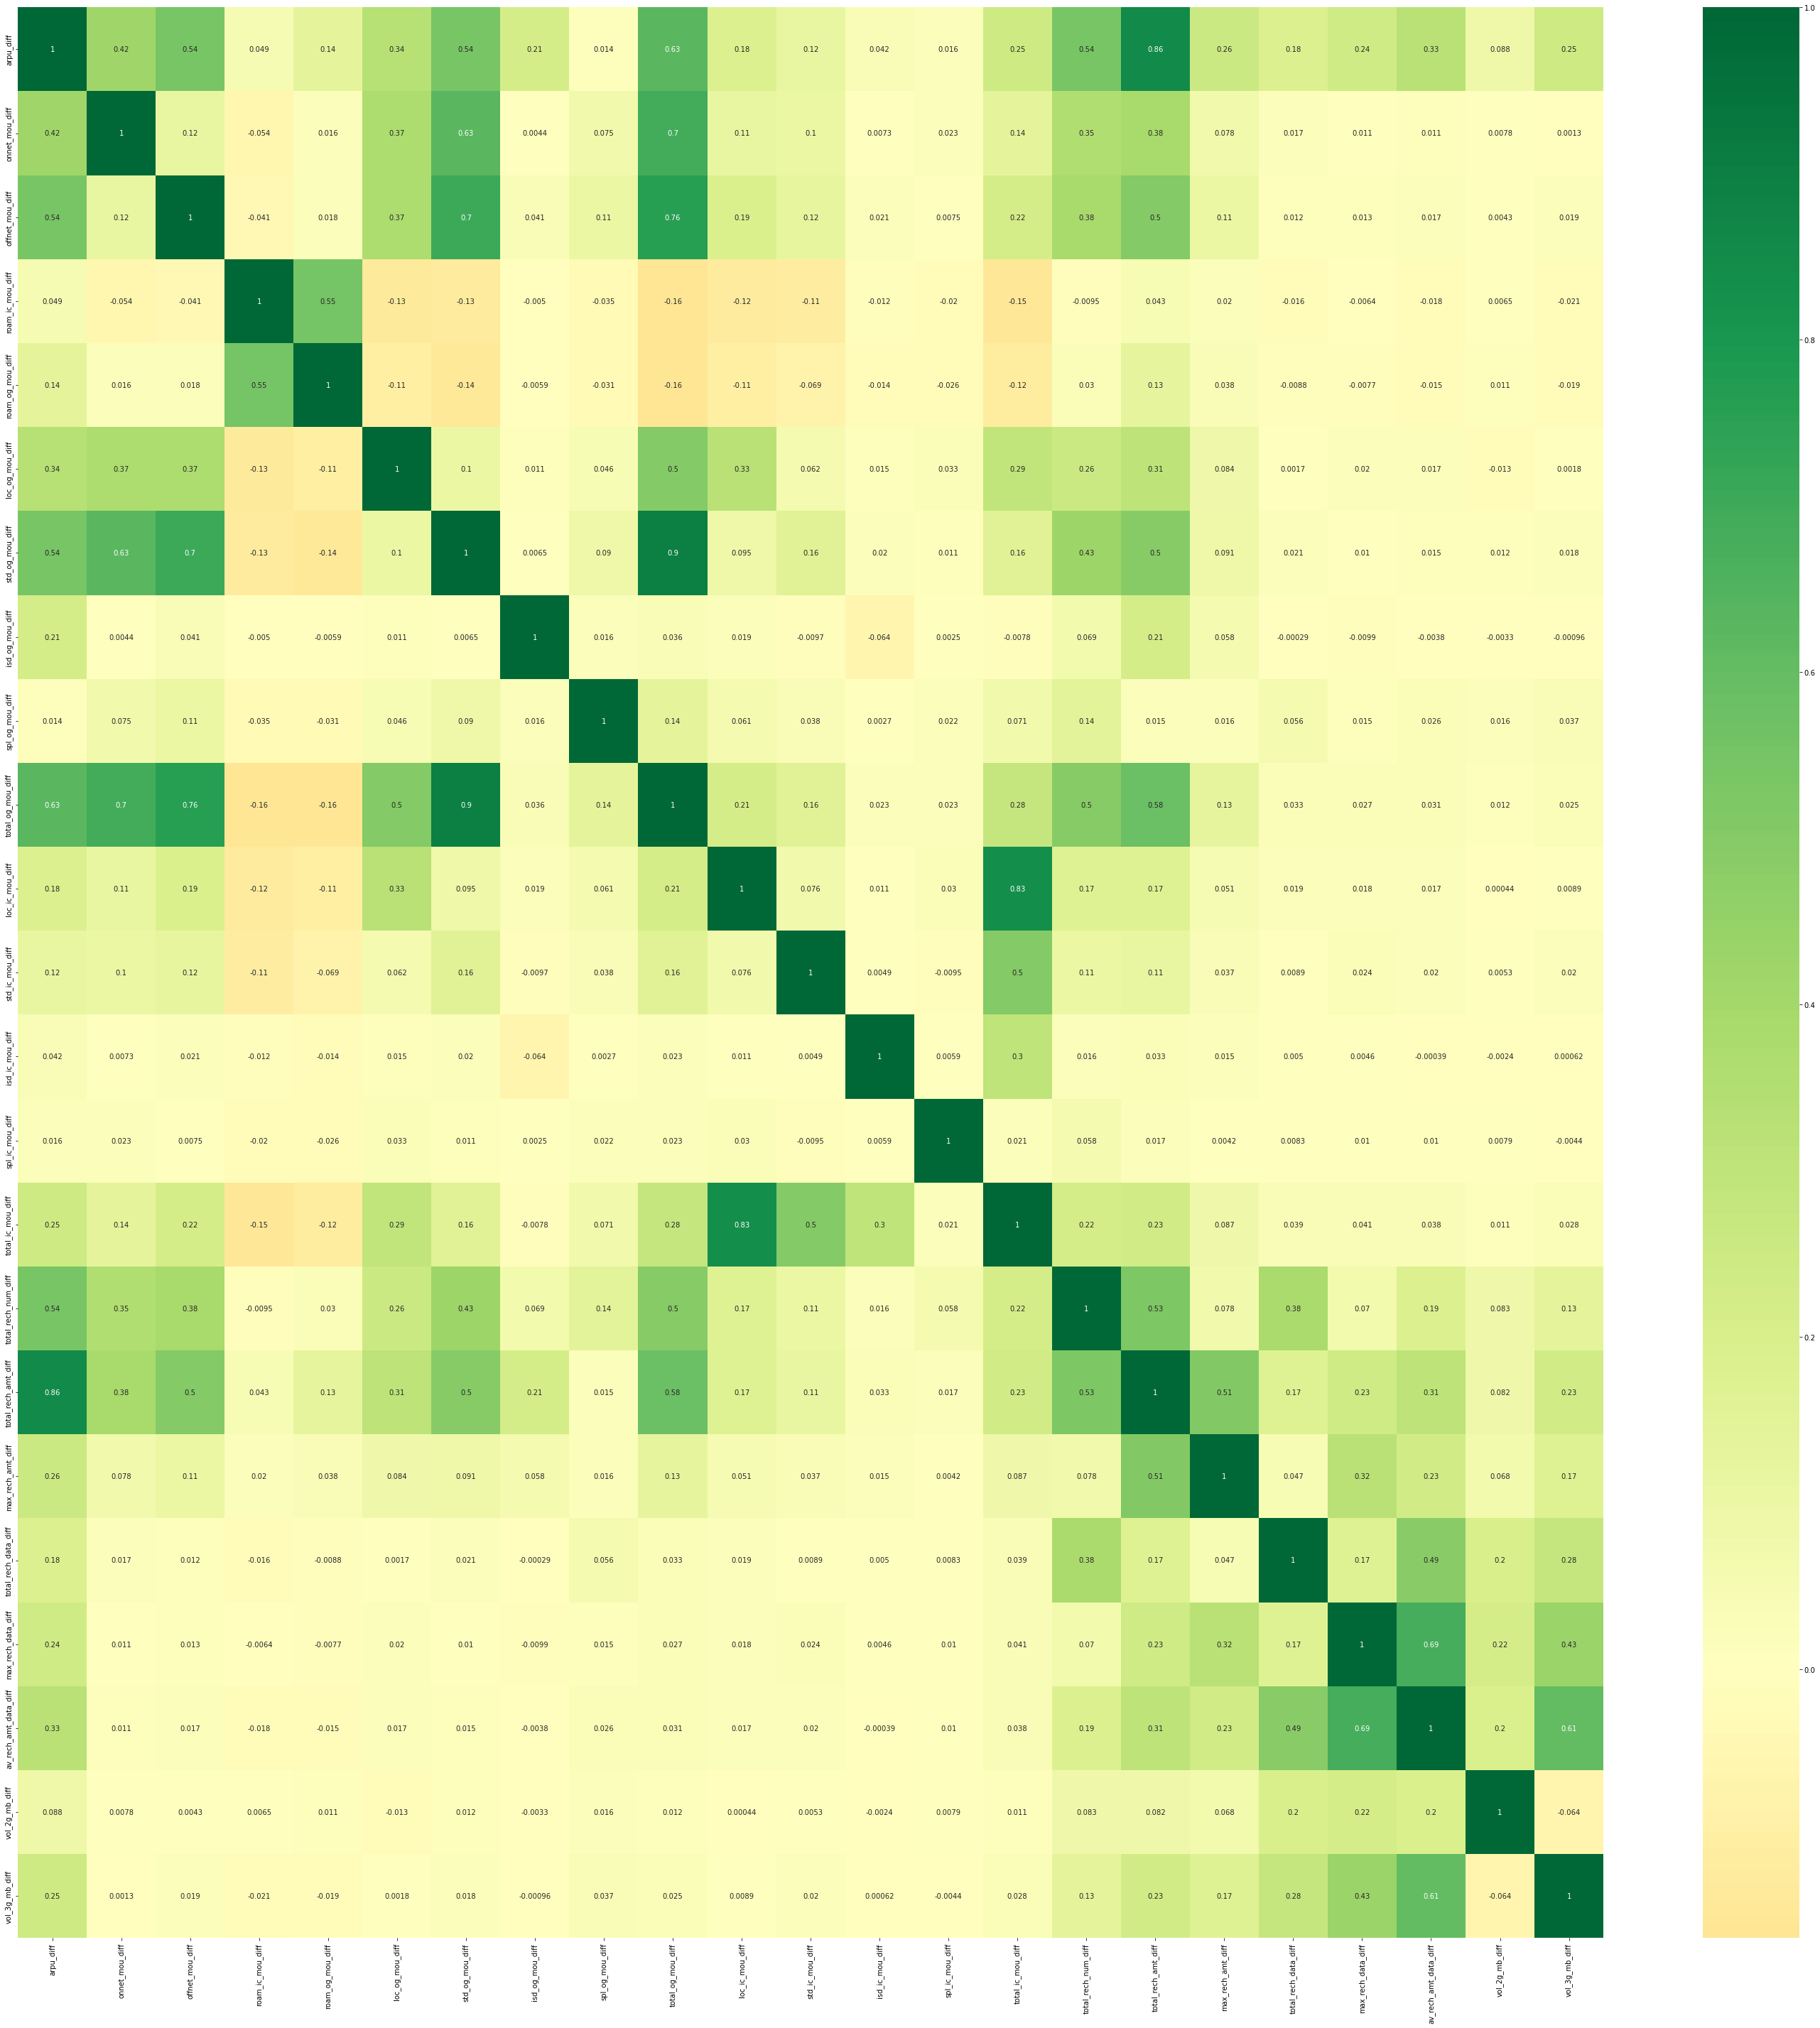

In [55]:
# heatmap
plt.figure(figsize=(50,50))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn', center=0)
plt.show()

- We can see from the heatmap of derived features, few of them are highly correlated

## <font color=red> Data Preprocessing

### <font color=blue>Outliers Treatment

In [56]:
# defining a function for outlier capping
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [57]:
# capping outliers

# for churn dataset
churn_filter[num_cols] = churn_filter[num_cols].apply(cap_outliers, axis=0)

# for unseen dataset
unseen[num_cols] = unseen[num_cols].apply(cap_outliers, axis=0)

### <font color=blue> Removing unwanted columns

In [58]:
# remove date columns from churn
churn_filter.drop(columns=date_cols, inplace=True)

# remove date columns from unseen
unseen.drop(columns=date_cols, inplace=True)

In [59]:
# check shape
print(churn_filter.shape)
print(unseen.shape)

(21013, 164)
(30000, 163)


## <font color=red> Data Preparation

### <font color=blue> Splitting into X and y

In [60]:
# splitting data into X and y
X = churn_filter.drop(columns = ['id','churn_probability'])
y = churn_filter['churn_probability']

In [61]:
# check the shape
print(X.shape)
print(y.shape)

(21013, 162)
(21013,)


### <font color=blue>train_test_split

In [62]:
# importing library
from sklearn.model_selection import train_test_split

#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=0)

In [63]:
print(X_test.shape)
print(X_train.shape)

(6304, 162)
(14709, 162)


### <font color=blue>Scaling

In [64]:
# importing library
from sklearn.preprocessing import StandardScaler

# initiate object
scaler = StandardScaler()

# fit_transform() train data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# transform() test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

# trasnform() on unseen data
unseen[num_cols] = scaler.transform(unseen[num_cols])

In [65]:
X_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,

## <font color=red>Building Model

### <font color=blue>Logistic Regression without PCA (to identify top features)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [67]:
# baseline model using all features
base_model = LogisticRegression(random_state=42, class_weight='balanced') # `weight of class` balancing technique used
base_model = base_model.fit(X_train, y_train)

# probability prediction on train and test
y_train_pred_prob = pd.Series(base_model.predict_proba(X_train)[:,1])
y_test_pred_prob = pd.Series(base_model.predict_proba(X_test)[:,1])

# prediction at threshold of 0.5
y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

In [68]:
# defining function to calculate all evaluation terms
from sklearn.metrics import confusion_matrix
def model_eval(y_true, y_pred):
    # confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # accuracy
    acc= (TP+TN)/(TP+TN+FP+FN)
    # sensitivity/recall
    sensi = TP/(TP+FN)
    # specificity
    spec = TN/(TN+FP)
    # Positive Predicted Values or Precision
    prec = TP/(TP+FP)
    # F-Score
    F = (2*prec*sensi)/(prec+sensi)
    
    # display all metrics
    print(color.RED+'Accuracy:'+color.END,round(acc,3))
    print(color.RED+'Sensitivity/Recall:'+color.END,round(sensi,3))
    print(color.RED+'Specificity:'+color.END,round(spec,3))
    print(color.RED+'Precision'+color.END, round(prec,3))
    print(color.RED+'F-score:'+color.END,round(F,3))
    
    # display confusion matrix
    confusion=pd.DataFrame(confusion, columns=['Not Converted','Converted'], index=['Not Converted','Converted'])
    confusion.index.name='Actual/Predicted'
    return confusion

In [69]:
# defining a func to plot the ROC curve
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
# assessing base model at 0.5 threshold
print(color.BOLD+color.UNDERLINE+'Train performance:'+color.END)
print(model_eval(y_train,y_train_pred))

print('='*70)

print(color.BOLD+color.UNDERLINE+'Test performance:'+color.END)
print(model_eval(y_test,y_test_pred))

Train performance:
Accuracy: 0.852
Sensitivity/Recall: 0.85
Specificity: 0.852
Precision 0.338
F-score: 0.484
                  Not Converted  Converted
Actual/Predicted                          
Not Converted             11505       2001
Converted                   180       1023
Test performance:
Accuracy: 0.843
Sensitivity/Recall: 0.806
Specificity: 0.846
Precision 0.327
F-score: 0.466
                  Not Converted  Converted
Actual/Predicted                          
Not Converted              4880        888
Converted                   104        432


ROC curve for train


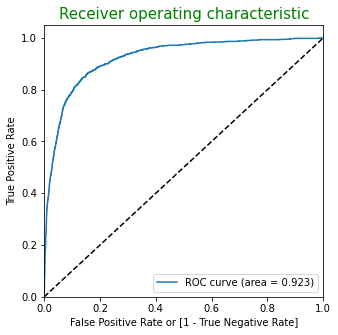

ROC curve for test


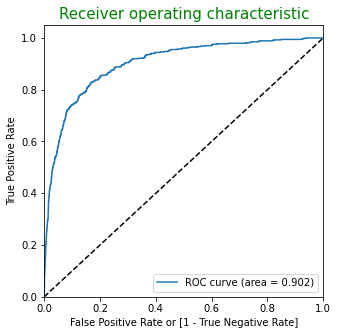

In [71]:
# ROC curve
print(color.BOLD+color.UNDERLINE+'ROC curve for train'+color.END)
draw_roc(y_train,y_train_pred_prob)

print('='*70)

print(color.BOLD+color.UNDERLINE+'ROC curve for test'+color.END)
draw_roc(y_test, y_test_pred_prob)

In [72]:
# finding optimal threshold
# list containing all threshold values
num = np.arange(0.0,1.1,0.1, dtype='float')
num2=[]
for i in num:
    num2.append(round(i,3))
    
# creating df containing predicted conversion for various threshold values
y_train_pred_thresh = pd.DataFrame({'ID': y_train.index,'pred_prob':y_train_pred_prob})
for i in num2:
    y_train_pred_thresh[i] = y_train_pred_thresh.pred_prob.apply(lambda x: 1 if x>i else 0)
    
y_train_pred_thresh.head()

,ID,pred_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,32666,0.838066,1,1,1,1,1,1,1,1,1,0,0
1,18833,0.041276,1,0,0,0,0,0,0,0,0,0,0
2,19890,0.082083,1,0,0,0,0,0,0,0,0,0,0
3,46108,0.364891,1,1,1,1,0,0,0,0,0,0,0
4,28567,0.720085,1,1,1,1,1,1,1,1,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in num2:
    cm1 = confusion_matrix(y_train, y_train_pred_thresh[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df.head()

,prob,accuracy,sensi,speci
0.0,0.0,0.081787,1.000000,0.000000
0.1,0.1,0.487729,0.980881,0.443803
0.2,0.2,0.639880,0.962594,0.611136
0.3,0.3,0.736556,0.929343,0.719384
0.4,0.4,0.799578,0.893599,0.791204


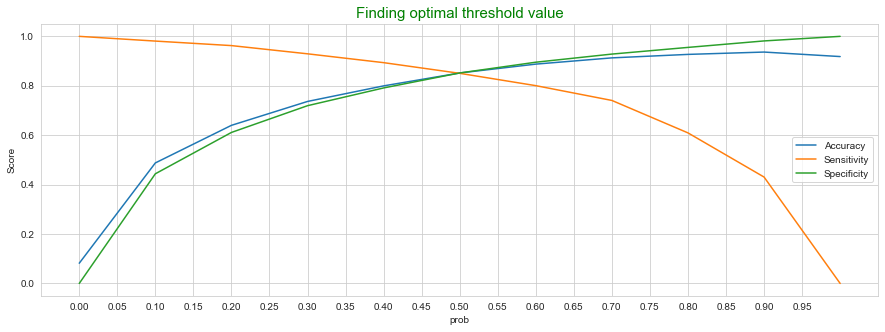

In [74]:
# plot accuracy, sensitivity and specificity to find optimal threshold value
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.lineplot(data=cutoff_df, x='prob', y='accuracy', label='Accuracy')
sns.lineplot(data=cutoff_df, x='prob', y='sensi', label='Sensitivity')
sns.lineplot(data=cutoff_df, x='prob', y='speci', label='Specificity')
plt.xticks(np.arange(0,1,0.05))
plt.ylabel('Score')
plt.legend()
plt.title('Finding optimal threshold value',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

- we can clearly see that optimal threshold is 0.5 itself

<font color=brown> **Logistic regression with RFE**

In [75]:
# RFE
lr = LogisticRegression(random_state=42, class_weight='balanced')
rfe = RFE(estimator=lr, n_features_to_select = 10)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(class_weight='balanced', random_state=42),
    n_features_to_select=10)

In [76]:
# list of all variables with their rankings
df = pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_))
df = df.rename(columns={0:'Feature',1:'Chosen',2:'Ranking'})
df.sort_values(by='Ranking')

,Feature,Chosen,Ranking
29,loc_og_mou_8,True,1
134,fb_user_8,True,1
41,std_og_mou_8,True,1
32,std_og_t2t_mou_8,True,1
153,total_ic_mou_diff,True,1
20,loc_og_t2m_mou_8,True,1
78,total_ic_mou_6,True,1
119,night_pck_user_8,True,1
53,total_og_mou_8,True,1
17,loc_og_t2t_mou_8,True,1


In [77]:
# columns selected by RFE
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'total_ic_mou_6',
       'night_pck_user_8', 'fb_user_8', 'total_ic_mou_diff'],
      dtype='object')

In [78]:
# model using features selected by RFE
lr_rfe = LogisticRegression(random_state=42, class_weight='balanced') # `weight of class` balancing technique used
lr_rfe = base_model.fit(X_train[col_rfe], y_train)

# probability prediction on train and test
y_train_pred_prob_rfe = pd.Series(lr_rfe.predict_proba(X_train[col_rfe])[:,1])
y_test_pred_prob_rfe = pd.Series(lr_rfe.predict_proba(X_test[col_rfe])[:,1])

# prediction at threshold of 0.5
y_train_pred_rfe = base_model.predict(X_train[col_rfe])
y_test_pred_rfe = base_model.predict(X_test[col_rfe])

In [79]:
# assessing base model at 0.5 threshold
print(color.BOLD+color.UNDERLINE+'Train performance:'+color.END)
print(model_eval(y_train,y_train_pred_rfe))

print('='*70)

print(color.BOLD+color.UNDERLINE+'Test performance:'+color.END)
print(model_eval(y_test,y_test_pred_rfe))

Train performance:
Accuracy: 0.8
Sensitivity/Recall: 0.813
Specificity: 0.799
Precision 0.265
F-score: 0.399
                  Not Converted  Converted
Actual/Predicted                          
Not Converted             10787       2719
Converted                   225        978
Test performance:
Accuracy: 0.791
Sensitivity/Recall: 0.802
Specificity: 0.79
Precision 0.262
F-score: 0.395
                  Not Converted  Converted
Actual/Predicted                          
Not Converted              4559       1209
Converted                   106        430


ROC curve for train


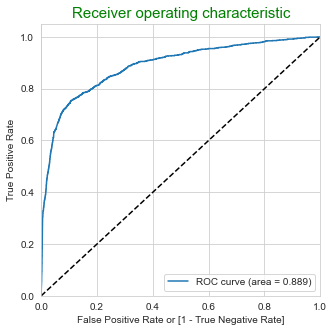

ROC curve for test


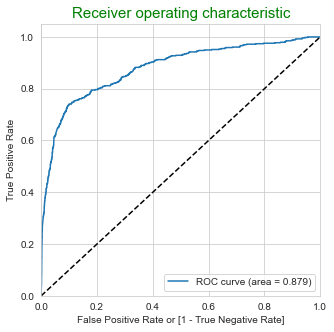

In [80]:
# ROC curve
print(color.BOLD+color.UNDERLINE+'ROC curve for train'+color.END)
draw_roc(y_train,y_train_pred_prob_rfe)

print('='*70)

print(color.BOLD+color.UNDERLINE+'ROC curve for test'+color.END)
draw_roc(y_test, y_test_pred_prob_rfe)

In [81]:
# finding optimal threshold
# list containing all threshold values
num = np.arange(0.0,1.1,0.1, dtype='float')
num2=[]
for i in num:
    num2.append(round(i,3))
    
# creating df containing predicted conversion for various threshold values
y_train_pred_thresh = pd.DataFrame({'ID': y_train.index,'pred_prob':y_train_pred_prob_rfe})
for i in num2:
    y_train_pred_thresh[i] = y_train_pred_thresh.pred_prob.apply(lambda x: 1 if x>i else 0)
    
y_train_pred_thresh.head()

,ID,pred_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,32666,0.265767,1,1,1,0,0,0,0,0,0,0,0
1,18833,0.140486,1,1,0,0,0,0,0,0,0,0,0
2,19890,0.171947,1,1,0,0,0,0,0,0,0,0,0
3,46108,0.512084,1,1,1,1,1,1,0,0,0,0,0
4,28567,0.727077,1,1,1,1,1,1,1,1,0,0,0


In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in num2:
    cm1 = confusion_matrix(y_train, y_train_pred_thresh[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df.head()

,prob,accuracy,sensi,speci
0.0,0.0,0.081787,1.000000,0.000000
0.1,0.1,0.342647,0.969244,0.286835
0.2,0.2,0.495343,0.945137,0.455279
0.3,0.3,0.633490,0.910224,0.608841
0.4,0.4,0.748113,0.852037,0.738857


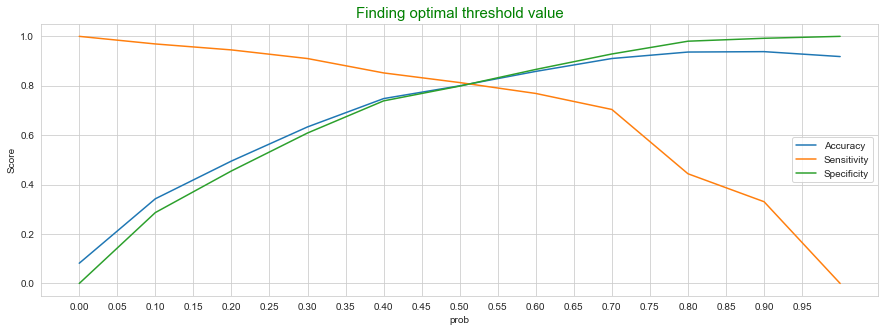

In [83]:
# plot accuracy, sensitivity and specificity to find optimal threshold value
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.lineplot(data=cutoff_df, x='prob', y='accuracy', label='Accuracy')
sns.lineplot(data=cutoff_df, x='prob', y='sensi', label='Sensitivity')
sns.lineplot(data=cutoff_df, x='prob', y='speci', label='Specificity')
plt.xticks(np.arange(0,1,0.05))
plt.ylabel('Score')
plt.legend()
plt.title('Finding optimal threshold value',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

- we can clearly see that optimal threshold is 0.5

In [84]:
# top 10 features 
df_coeff = pd.DataFrame({'Features':lr_rfe.feature_names_in_, 'Importance':lr_rfe.coef_[0], 'Absolute value':np.abs(lr_rfe.coef_[0])})
df_coeff = df_coeff.sort_values(by = 'Absolute value', ascending=False)
top_features = df_coeff[['Features','Importance']]
top_features

,Features,Importance
5,total_og_mou_8,-3.904768
2,loc_og_mou_8,3.383223
4,std_og_mou_8,3.152762
1,loc_og_t2m_mou_8,-1.703669
8,fb_user_8,-1.376815
9,total_ic_mou_diff,-1.213372
7,night_pck_user_8,1.088039
6,total_ic_mou_6,-0.995439
0,loc_og_t2t_mou_8,-0.869315
3,std_og_t2t_mou_8,-0.082842


### <font color=blue>PCA

In [85]:
# import library
from sklearn.decomposition import PCA

# initiate object
pca = PCA(random_state=42)

# fit() model
pca.fit(X_train)

PCA(random_state=42)

In [86]:
pca.explained_variance_ratio_

array([1.13183670e-01, 9.41707089e-02, 5.79772636e-02, 4.95262959e-02,
       3.98432473e-02, 3.77489274e-02, 2.79516091e-02, 2.60118275e-02,
       2.37589855e-02, 2.21019023e-02, 2.02480144e-02, 1.92425974e-02,
       1.79925871e-02, 1.72112148e-02, 1.70611623e-02, 1.48556498e-02,
       1.41021702e-02, 1.37458925e-02, 1.34120193e-02, 1.28307751e-02,
       1.20506362e-02, 1.19297757e-02, 1.13102252e-02, 1.10645582e-02,
       1.02953810e-02, 1.00138427e-02, 9.73283336e-03, 9.45875564e-03,
       9.26672972e-03, 8.92764233e-03, 8.67658852e-03, 8.34383090e-03,
       8.02737642e-03, 7.88584537e-03, 7.63295317e-03, 7.41290372e-03,
       7.34111066e-03, 6.99066260e-03, 6.57157494e-03, 6.42677447e-03,
       6.27034918e-03, 5.68141265e-03, 5.48680048e-03, 5.42151771e-03,
       5.28482786e-03, 4.91997605e-03, 4.81684960e-03, 4.68293261e-03,
       4.45207366e-03, 4.18586986e-03, 3.80889643e-03, 3.71487343e-03,
       3.61576213e-03, 3.48591510e-03, 3.43245235e-03, 3.30834960e-03,
      

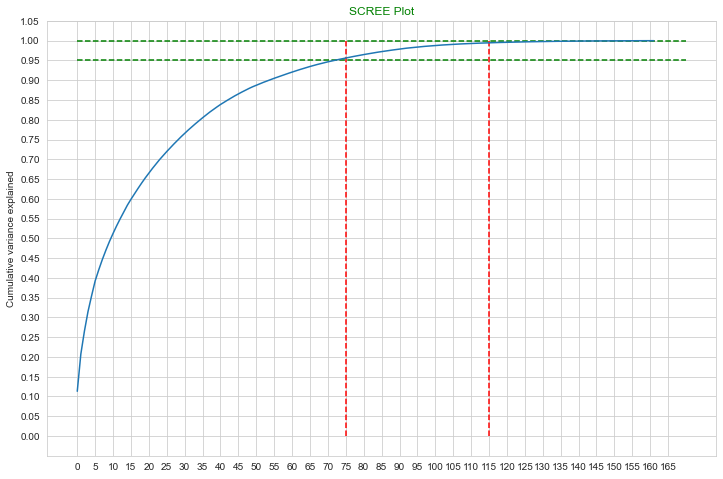

In [87]:
# SCREE plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=115, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=170, xmin=0, colors="g", linestyles="--")
plt.hlines(y=1.0, xmax=170, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.title('SCREE Plot', color='g')
plt.xticks(np.arange(0,170,5))
plt.yticks(np.arange(0,1.1,0.05))
plt.show()

From the above scree plot, it is clear that 
- 95% of variance in the train set can be explained by first 75 principal components 
- 100% of variance is explained by the first 115 principal components. 

In [88]:
# Perform PCA using the first 75 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=75)
transformed_data = pca_final.fit_transform(X_train)

X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,76)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,churn_probability
32666,0.381515,-1.217695,1.605950,0.249464,-3.011480,-1.307197,-3.044362,1.044669,1.179594,13.691386,8.735899,3.830679,0.040154,0.601402,0.456411,-6.763622,8.166756,10.714160,-1.592533,-3.250604,2.291695,0.986758,-1.257005,-1.764036,0.603955,4.207190,-1.873842,4.413144,-5.692972,1.199131,4.591925,0.136082,2.948132,-0.327935,-0.338153,-0.962400,-4.153820,2.143880,3.611434,1.417636,-1.313311,2.005001,-0.399773,-1.505150,-0.358915,0.443758,-0.025798,0.229562,0.038626,-0.871718,0.589955,-0.075316,-0.047807,0.662681,-0.485860,0.270230,0.250250,0.014706,-0.557097,-0.481417,-0.250342,0.029598,-0.000096,0.896218,0.556893,-0.110666,-0.757228,-0.614680,-0.045456,-0.334289,-0.235449,0.036825,-0.257304,0.231088,0.169734,0
18833,-2.694340,1.975179,5.256543,1.387281,-2.200695,-2.690616,-1.533374,6.607974,-0.538233,-0.966052,0.963449,-0.459131,2.427721,-0.014910,2.212064,-0.331631,-1.088311,1.838301,2.198438,0.707524,0.821739,-2.567717,0.645001,1.206901,-0.797756,-0.136840,-2.136441,-1.667591,-0.171791,-0.299394,0.195210,0.352606,-0.232262,0.453209,0.712927,-0.555578,0.117282,-0.048550,0.253922,0.127823,-0.911683,-1.338358,0.222083,0.123859,-1.547488,0.071765,0.144444,-0.190235,-1.655951,1.271678,0.508757,0.460567,-0.982364,0.171556,-1.040417,0.093488,0.493224,0.137538,-0.140980,-0.409413,-0.720265,0.214389,-0.382126,0.740950,-0.071256,-0.716017,0.885438,-0.553249,0.153888,0.240883,-0.301613,-0.208272,-0.051164,-0.371332,1.496764,0
19890,-2.898341,1.628643,0.764631,-0.563493,-2.256911,-1.298627,-0.491747,1.461058,0.014314,-1.326766,0.402253,-0.153507,-0.138733,0.438041,-0.347209,-0.307100,0.437321,-0.793876,-0.102523,-1.061892,-0.269390,-0.848828,-0.687598,-0.748894,-0.191579,-0.761493,-0.719072,0.119074,-0.371011,0.299848,-0.688423,-0.613970,0.429269,0.002774,-0.127691,-0.078433,-0.514800,0.727116,-0.105887,-1.166217,-1.148284,-0.730746,0.195600,-0.854930,-0.193577,0.276321,0.767587,-0.036548,1.595189,0.498674,0.755768,0.220657,0.418373,-0.857556,-0.882001,-0.195894,-0.669558,0.235030,0.523386,-1.593872,-2.195994,-0.399614,-0.214061,1.055461,0.414769,0.223990,0.195501,0.376075,0.118360,-0.101203,-0.053687,1.745982,-0.297787,0.294382,-0.270231,0
46108,2.229994,-5.533045,1.122249,-1.374154,0.410591,-0.392357,-2.239520,-0.668435,-1.835151,-0.630904,-0.161460,0.116882,-0.783721,-0.369921,-0.550114,1.037916,0.343417,0.592229,1.346679,-1.221836,0.259987,0.053957,0.345854,0.580255,-0.255708,-0.098600,-0.229932,-0.050479,-0.495324,0.361790,0.192051,0.777765,0.319746,-0.289598,-0.376881,-0.005531,-0.297767,-0.163909,-0.019584,-0.007381,-0.168950,1.158546,-0.506614,-0.261911,0.463887,-0.152344,-0.225595,0.092899,-0.350820,1.102074,-0.581805,0.294592,-0.422735,0.292851,-0.148110,0.033448,-0.007688,0.050028,0.195824,0.661100,-0.158596,-0.024494,-0.223192,0.220268,0.445497,-0.033387,-0.282410,0.012300,0.154270,-0.052531,-0.102530,-0.081473,-0.079048,0.139885,-0.094324,0
28567,-5.664936,2.457530,3.110963,-1.000690,-1.202373,-1.657163,0.258168,0.117230,-0.919727,-0.828955,1.007010,-1.876482,0.287004,0.436499,0.071343,0.437556,-0.618480,0.989384,0.513876,1.184767,1.236072,0.340645,0.564538,2.112517,1.187466,0.140664,0.578331,0.586034,0.219887,0.064519,-0.116327,1.044961,-0.072321,1.550390,0.041294,-0.080601,-0.316392,0.223957,-0.121542,0.897693,1.651117,-0.089359,-0.485553,0.661407,-0.326673,0.065529,-0.190788,0.033770,0.053331,-0.901232,-0.003013,-0.275038,0.004844,-0.938060,0.719880,1.030368,1.007960,1.446589,0.237367,0.177203,-0.234597,0.241158,-0.242680,0.867871,-1.076463,-0.447544,-0.221832,0.523919,

In [89]:
data_train_pca.describe()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,churn_probability
count,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,1.470900e+04,14709.000000
mean,2.362649e-16,-5.542888e-16,-1.839276e-16,1.398252e-17,2.867001e-16,1.793951e-17,1.258691e-16,7.387901e-17,-2.419862e-17,6.008141e-17,-4.874067e-17,-2.167762e-17,-2.191160e-17,1.095957e-17,3.159558e-17,1.490270e-16,-2.490812e-18,-3.539973e-17,2.092282e-17,1.025762e-16,-5.024271e-17,-7.768316e-17,-1.387873e-17,5.630109e-17,5.345812e-17,-4.415531e-17,5.174851e-17,-6.127399e-17,-1.659751e-17,-4.215511e-18,-1.968497e-17,-2.775369e-17,8.682368e-17,1.364059e-16,9.580193e-17,2.449299e-18,9.856069e-17,-5.525452e-17,5.813405e-17,2.112662e-17,1.664919e-16,1.154680e-16,-4.770283e-17,-7.162218e-17,-1.306544e-17,-1.769986e-17,4.171733e-17,-2.229013e-16,1.146453e-16,-1.862071e-17,-2.916515e-17,-2.020872e-17,-3.995112e-17,8.966925e-18,1.505055e-17,2.960293e-17,6.494982e-18,-2.679133e-17,-2.604137e-17,-7.132781e-18,5.090315e-17,-2.511947e-17,-2.662528e-18,-7.201844e-17,1.931701e-17,8.197037e-18,3.035772e-17,3.881139e-17,2.875851e-17,-2.735554e-17,-2.442506e-17,1.456465e-17,-2.333438e-17,2.850848e-17,-3.774713e-17,0.081787
std,4.251122e+00,3.877659e+00,3.042570e+00,2.812093e+00,2.522255e+00,2.455070e+00,2.112589e+00,2.037966e+00,1.947715e+00,1.878565e+00,1.798054e+00,1.752844e+00,1.694955e+00,1.657742e+00,1.650501e+00,1.540129e+00,1.500563e+00,1.481486e+00,1.463383e+00,1.431321e+00,1.387125e+00,1.380149e+00,1.343835e+00,1.329163e+00,1.282128e+00,1.264475e+00,1.246602e+00,1.228922e+00,1.216386e+00,1.193926e+00,1.177021e+00,1.154225e+00,1.132128e+00,1.122094e+00,1.103953e+00,1.087929e+00,1.082631e+00,1.056479e+00,1.024272e+00,1.012965e+00,1.000563e+00,9.524179e-01,9.359223e-01,9.303674e-01,9.185376e-01,8.862624e-01,8.769375e-01,8.646711e-01,8.430824e-01,8.174440e-01,7.796801e-01,7.700816e-01,7.596689e-01,7.458323e-01,7.399197e-01,7.266368e-01,7.172124e-01,7.130814e-01,7.105402e-01,7.032266e-01,6.934945e-01,6.905586e-01,6.796920e-01,6.705550e-01,6.621717e-01,6.526921e-01,6.408753e-01,6.156828e-01,6.027420e-01,5.971640e-01,5.854679e-01,5.656726e-01,5.572386e-01,5.395584e-01,5.313510e-01,0.274049
min,-8.495843e+00,-1.097443e+01,-1.033378e+01,-1.607952e+01,-1.029293e+01,-8.758752e+00,-8.764951e+00,-1.034046e+01,-4.875202e+00,-6.735758e+00,-1.276481e+01,-6.824486e+00,-8.923789e+00,-8.963990e+00,-7.342030e+00,-1.006761e+01,-1.044908e+01,-1.182392e+01,-7.006419e+00,-7.572268e+00,-6.770639e+00,-7.208250e+00,-8.880165e+00,-5.451478e+00,-7.624628e+00,-8.841834e+00,-1.609971e+01,-5.916764e+00,-9.795137e+00,-1.506349e+01,-8.202813e+00,-6.351800e+00,-6.400721e+00,-6.443081e+00,-5.824458e+00,-1.048469e+01,-8.692908e+00,-7.007105e

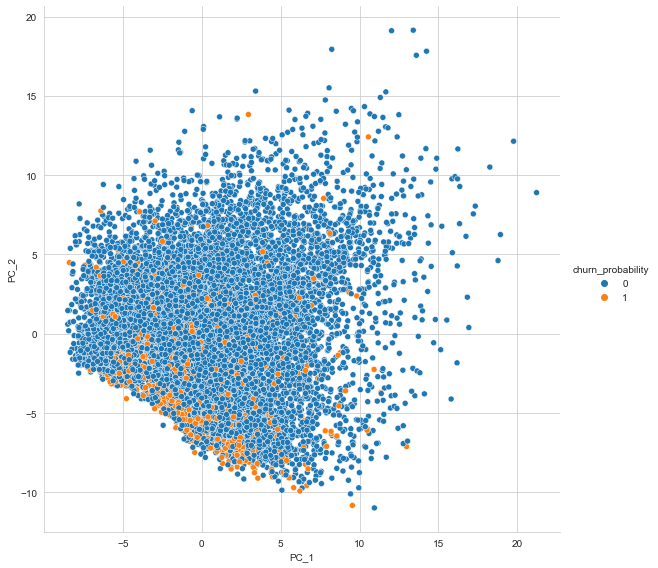

In [90]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8)

### <font color=blue>Logistic Regression with PCA

In [91]:
# X,y Split
y_train_pca = data_train_pca.pop('churn_probability')
X_train_pca = data_train_pca

# Transforming test set with pca ( 75 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca )

LogisticRegression(class_weight='balanced', random_state=100)

In [92]:
# probability prediction on train and test
y_train_pred_prob_lr_pca = pd.Series(lr_pca.predict_proba(X_train_pca)[:,1])
y_test_pred_prob_lr_pca = pd.Series(lr_pca.predict_proba(X_test_pca)[:,1])

# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
# Test Prediction
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)

In [93]:
# assessing base model at 0.5 threshold
print(color.BOLD+color.UNDERLINE+'Train performance:'+color.END)
print(model_eval(y_train,y_train_pred_lr_pca))

print('='*70)

print(color.BOLD+color.UNDERLINE+'Test performance:'+color.END)
print(model_eval(y_test,y_test_pred_lr_pca))

Train performance:
Accuracy: 0.813
Sensitivity/Recall: 0.835
Specificity: 0.811
Precision 0.282
F-score: 0.422
                  Not Converted  Converted
Actual/Predicted                          
Not Converted             10948       2558
Converted                   198       1005
Test performance:
Accuracy: 0.813
Sensitivity/Recall: 0.832
Specificity: 0.811
Precision 0.29
F-score: 0.43
                  Not Converted  Converted
Actual/Predicted                          
Not Converted              4677       1091
Converted                    90        446


ROC curve for train


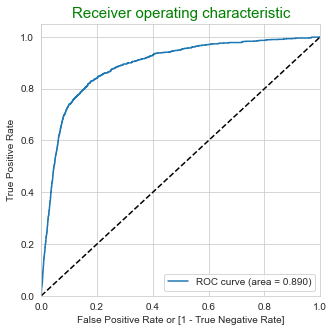

ROC curve for test


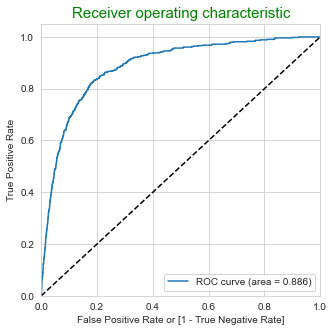

In [95]:
# ROC curve
print(color.BOLD+color.UNDERLINE+'ROC curve for train'+color.END)
draw_roc(y_train,y_train_pred_prob_lr_pca)

print('='*70)

print(color.BOLD+color.UNDERLINE+'ROC curve for test'+color.END)
draw_roc(y_test, y_test_pred_prob_lr_pca)

**Hyperparameter tuning**

In [96]:
from sklearn.model_selection import GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l2','none'], 
    'C' : [100,50,10,5,1,0.1,0.05,0.01,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001,0.0005,0.0001]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)


search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='accuracy', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 38 candidates, totalling 152 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [100, 50, 10, 5, 1, 0.1, 0.05, 0.01, 0.009, 0.008,
                               0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001,
                               0.0005, 0.0001],
                         'penalty': ['l2', 'none']},
             scoring='accuracy', verbose=True)

In [97]:
# results of grid search CV
cv_results = pd.DataFrame(search.cv_results_)
cv_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
32,0.271509,0.007092,0.007320,0.000899,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.805329,0.811259,0.808540,0.816970,0.810525,0.004273,1
16,0.440205,0.009319,0.007251,0.000433,0.009,l2,"{'C': 0.009, 'penalty': 'l2'}",0.804785,0.808540,0.807996,0.820234,0.810389,0.005862,2
14,0.438003,0.026767,0.008001,0.000707,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.804241,0.808812,0.807724,0.819146,0.809981,0.005554,3
18,0.433465,0.025482,0.008250,0.002770,0.008,l2,"{'C': 0.008, 'penalty': 'l2'}",0.803698,0.807996,0.807452,0.820234,0.809845,0.006222,4
8,0.477344,0.037490,0.016590,0.007014,1,l2,"{'C': 1, 'penalty': 'l2'}",0.805057,0.809083,0.805004,0.819962,0.809777,0.006109,5
30,0.291069,0.017425,0.007317,0.000407,0.002,l2,"{'C': 0.002, 'penalty': 'l2'}",0.806145,0.807996,0.808268,0.816698,0.809777,0.004079,6
26,0.327274,0.016427,0.007500,0.000501,0.004,l2,"{'C': 0.004, 'penalty': 'l2'}",0.804241,0.808540,0.808540,0.817514,0.809709,0.004836,7
31,0.462188,0.024118,0.007004,0.000708,0.002,none,"{'C': 0.002, 'penalty': 'none'}",0.805057,0.808812,0.805004,0.819962,0.809709,0.006118,8
29,0.446756,0.028089,0.009751,0.000828,0.003,none,"{'C': 0.003, 'penalty': 'none'}",0.805057,0.808812,0.805004,0.819962,0.809709,0.006118,8
28,0.319801,0.025918,0.008253,0.000435,0.003,l2,"{'C': 0.003, 'penalty': 'l2'}",0.805057,0.806908,0.808268,0.818602,0.809709,0.005260,8


In [98]:
# Optimum Hyperparameters
print('Best Accuracy score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best Accuracy score : 0.8105245220979641
Best Parameters : {'C': 0.001, 'penalty': 'l2'}


In [99]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)

# probability prediction on train and test
y_train_pred_prob_lr_pca_best = pd.Series(lr_pca_best.predict_proba(X_train_pca)[:,1])
y_test_pred_prob_lr_pca_best = pd.Series(lr_pca_best.predict_proba(X_test_pca)[:,1])

ROC curve for train


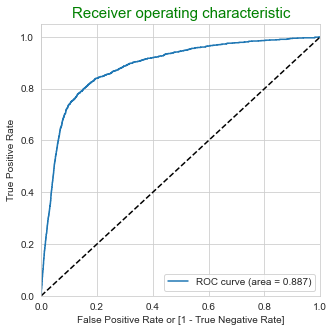

ROC curve for test


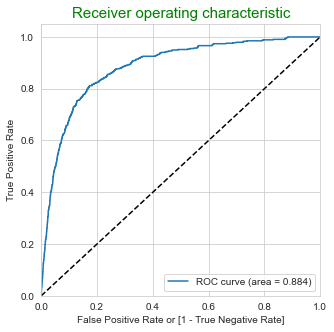

In [101]:
# ROC curve
print(color.BOLD+color.UNDERLINE+'ROC curve for train'+color.END)
draw_roc(y_train,y_train_pred_prob_lr_pca_best)

print('='*70)

print(color.BOLD+color.UNDERLINE+'ROC curve for test'+color.END)
draw_roc(y_test, y_test_pred_prob_lr_pca_best)

In [102]:
# assessing base model at 0.5 threshold
print(color.BOLD+color.UNDERLINE+'Train performance:'+color.END)
print(model_eval(y_train,y_train_pred_lr_pca_best))

print('='*70)

print(color.BOLD+color.UNDERLINE+'Test performance:'+color.END)
print(model_eval(y_test,y_test_pred_lr_pca_best))

Train performance:
Accuracy: 0.812
Sensitivity/Recall: 0.833
Specificity: 0.81
Precision 0.281
F-score: 0.42
                  Not Converted  Converted
Actual/Predicted                          
Not Converted             10945       2561
Converted                   201       1002
Test performance:
Accuracy: 0.811
Sensitivity/Recall: 0.817
Specificity: 0.811
Precision 0.286
F-score: 0.424
                  Not Converted  Converted
Actual/Predicted                          
Not Converted              4676       1092
Converted                    98        438


### <font color=blue>Random Forest with PCA

In [104]:
# import library
from sklearn.ensemble import RandomForestClassifier

# initiate object
rf_pca = RandomForestClassifier(random_state=100, oob_score=True, n_jobs=-1, class_weight='balanced')

# fit() model
rf_pca = rf_pca.fit(X_train_pca, y_train_pca)

In [105]:
# probability prediction on train and test
y_train_pred_prob_rf_pca = pd.Series(rf_pca.predict_proba(X_train_pca)[:,1])
y_test_pred_prob_rf_pca = pd.Series(rf_pca.predict_proba(X_test_pca)[:,1])

# y_train predictions
y_train_pred_rf_pca = rf_pca.predict(X_train_pca)
# Test Prediction
y_test_pred_rf_pca = rf_pca.predict(X_test_pca)

ROC curve for train


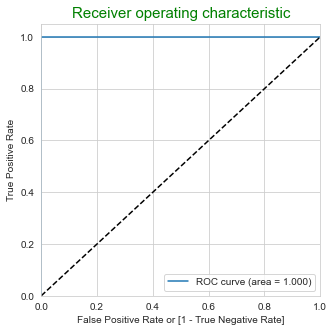

ROC curve for test


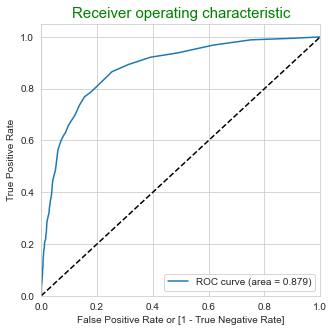

In [106]:
# ROC curve
print(color.BOLD+color.UNDERLINE+'ROC curve for train'+color.END)
draw_roc(y_train,y_train_pred_prob_rf_pca)

print('='*70)

print(color.BOLD+color.UNDERLINE+'ROC curve for test'+color.END)
draw_roc(y_test, y_test_pred_prob_rf_pca)

In [107]:
# assessing base model at 0.5 threshold
print(color.BOLD+color.UNDERLINE+'Train performance:'+color.END)
print(model_eval(y_train,y_train_pred_rf_pca))

print('='*70)

print(color.BOLD+color.UNDERLINE+'Test performance:'+color.END)
print(model_eval(y_test,y_test_pred_rf_pca))

Train performance:
Accuracy: 1.0
Sensitivity/Recall: 1.0
Specificity: 1.0
Precision 1.0
F-score: 1.0
                  Not Converted  Converted
Actual/Predicted                          
Not Converted             13506          0
Converted                     0       1203
Test performance:
Accuracy: 0.919
Sensitivity/Recall: 0.11
Specificity: 0.994
Precision 0.648
F-score: 0.188
                  Not Converted  Converted
Actual/Predicted                          
Not Converted              5736         32
Converted                   477         59


**Hyperparameter Tuning**

In [108]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,70,100],
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_leaf' : [15,20,25,30,35]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=rf_pca, param_grid=params, 
                                   cv=folds, scoring='accuracy', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [15, 20, 25, 30, 35],
                         'n_estimators': [30, 40, 50, 70, 100]},
             scoring='accuracy', verbose=True)

In [109]:
# results of grid search CV
cv_results = pd.DataFrame(pca_rf_model_search.cv_results_)
cv_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
129,5.735357,0.142687,0.732229,0.082808,8,15,100,"{'max_depth': 8, 'min_samples_leaf': 15, 'n_es...",0.902664,0.897743,0.896383,0.897471,0.898565,0.002421,1
127,3.192898,0.217915,1.084208,0.233932,8,15,50,"{'max_depth': 8, 'min_samples_leaf': 15, 'n_es...",0.900761,0.897743,0.893391,0.893663,0.896390,0.003056,2
128,3.876294,0.166452,2.265085,0.280438,8,15,70,"{'max_depth': 8, 'min_samples_leaf': 15, 'n_es...",0.902121,0.897199,0.893663,0.890672,0.895914,0.004264,3
126,2.442812,0.109226,0.999076,0.153610,8,15,40,"{'max_depth': 8, 'min_samples_leaf': 15, 'n_es...",0.898858,0.897471,0.892575,0.894479,0.895846,0.002464,4
134,6.052540,0.060675,0.792058,0.069601,8,20,100,"{'max_depth': 8, 'min_samples_leaf': 20, 'n_es...",0.900218,0.896383,0.888224,0.895023,0.894962,0.004331,5
125,2.392183,0.768315,0.444094,0.125587,8,15,30,"{'max_depth': 8, 'min_samples_leaf': 15, 'n_es...",0.898858,0.896655,0.888768,0.891488,0.893942,0.004010,6
139,5.408370,0.134392,0.637663,0.418770,8,25,100,"{'max_depth': 8, 'min_samples_leaf': 25, 'n_es...",0.898314,0.894479,0.888768,0.890944,0.893126,0.003623,7
132,2.966216,0.253590,0.861565,0.186236,8,20,50,"{'max_depth': 8, 'min_samples_leaf': 20, 'n_es...",0.899402,0.891216,0.884689,0.894207,0.892378,0.005319,8
138,4.165099,0.141058,1.369524,0.331792,8,25,70,"{'max_depth': 8, 'min_samples_leaf': 25, 'n_es...",0.898314,0.893391,0.886048,0.890400,0.892038,0.004466,9
133,3.993839,0.626542,1.722175,0.472893,8,20,70,"{'max_depth': 8, 'min_samples_leaf': 20, 'n_es...",0.897227,0.893935,0.884417,0.892304,0.891971,0.004708,10


In [110]:
# Optimum Hyperparameters
print('Best Accuracy score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best Accuracy score : 0.8985652254221124
Best Parameters : {'max_depth': 8, 'min_samples_leaf': 15, 'n_estimators': 100}


In [111]:
# Modelling using the best RF-PCA estimator 
rf_pca_best = pca_rf_model_search.best_estimator_
rf_pca_best_fit = rf_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_rf_pca_best = rf_pca_best_fit.predict(X_train_pca)
# Prediction on test set
y_test_pred_rf_pca_best = rf_pca_best_fit.predict(X_test_pca)

# probability prediction on train and test
y_train_pred_prob_rf_pca_best = pd.Series(rf_pca_best.predict_proba(X_train_pca)[:,1])
y_test_pred_prob_rf_pca_best = pd.Series(rf_pca_best.predict_proba(X_test_pca)[:,1])

ROC curve for train


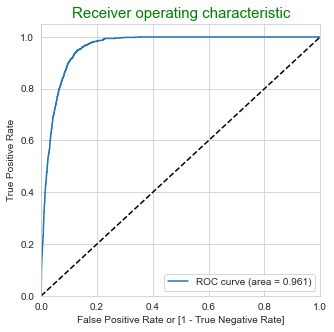

ROC curve for test


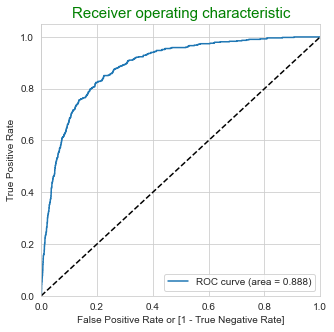

In [112]:
# ROC curve
print(color.BOLD+color.UNDERLINE+'ROC curve for train'+color.END)
draw_roc(y_train,y_train_pred_prob_rf_pca_best)

print('='*70)

print(color.BOLD+color.UNDERLINE+'ROC curve for test'+color.END)
draw_roc(y_test, y_test_pred_prob_rf_pca_best)

In [113]:
# assessing base model at 0.5 threshold
print(color.BOLD+color.UNDERLINE+'Train performance:'+color.END)
print(model_eval(y_train,y_train_pred_rf_pca_best))

print('='*70)

print(color.BOLD+color.UNDERLINE+'Test performance:'+color.END)
print(model_eval(y_test,y_test_pred_rf_pca_best))

Train performance:
Accuracy: 0.915
Sensitivity/Recall: 0.842
Specificity: 0.922
Precision 0.489
F-score: 0.619
                  Not Converted  Converted
Actual/Predicted                          
Not Converted             12449       1057
Converted                   190       1013
Test performance:
Accuracy: 0.889
Sensitivity/Recall: 0.632
Specificity: 0.913
Precision 0.403
F-score: 0.492
                  Not Converted  Converted
Actual/Predicted                          
Not Converted              5265        503
Converted                   197        339


## <font color=red> Conclusion and Recommendation

### <font color=blue> Important Features

- Logisitic Regression model using RFE was built to identify the top 10 features 

In [114]:
print(color.BOLD+color.UNDERLINE+'The top 10 features are:'+color.END)
top_features

The top 10 features are:


,Features,Importance
5,total_og_mou_8,-3.904768
2,loc_og_mou_8,3.383223
4,std_og_mou_8,3.152762
1,loc_og_t2m_mou_8,-1.703669
8,fb_user_8,-1.376815
9,total_ic_mou_diff,-1.213372
7,night_pck_user_8,1.088039
6,total_ic_mou_6,-0.995439
0,loc_og_t2t_mou_8,-0.869315
3,std_og_t2t_mou_8,-0.082842


- Features having month of Aug are highly important
- Some of them are related positively while some negatively
- Customers who have high outgoing calls in month of Aug are less likely to churn
- Customers making local calls on other mobiles in month of Aug are less likely to churn
- FB users in month of Aug are less likely to churn
- Whereas night pack users are more likely to churn
- Customers making local and STD calls within same operator are less likely to churn
- While customers making local and STD calls are more likely to churn

### <font color=blue> Model built with PCA

- Logistic Regression and Random Forest were used to built a model using PCA
- Both models were then hypertuned using CV
- Out of the two models, `rf_pca_best_fit` (Random Forest) will be used for prediction on unseen data as it has higher evaluation metrics for train and test 

## <font color=red>Creating submission file

In [115]:
# transforming unseen set with pca
X_unseen = unseen.drop(columns='id')
transformed_unseen_data = pca_final.transform(X_unseen)

unseen_pca = pd.DataFrame(transformed_unseen_data, columns=["PC_"+str(x) for x in range(1,76)], index = unseen.id)

unseen_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,-3.426911,-3.919171,-2.014085,0.996207,-3.252239,0.031575,-0.238228,0.539936,-1.087307,-1.159076,1.198463,-1.150930,-0.088185,0.733539,0.578306,0.310657,0.791978,0.339412,0.579723,-1.098796,-0.714753,1.581967,3.428415,2.107138,-1.183876,1.383751,-1.060229,-0.430211,0.474858,2.440713,0.342056,1.258297,-1.937534,-0.797409,-1.592478,1.308626,-0.084020,-0.001803,0.115448,0.044590,0.437362,0.403215,-0.099521,-0.423373,0.313779,0.761905,0.957228,0.188725,0.426389,-0.273150,-0.038801,0.311886,0.062331,0.105863,-0.248066,-0.490819,0.108907,-0.260041,-0.155123,0.101614,0.032531,-0.164455,-0.038585,0.184585,0.116477,-0.337045,0.455399,-0.199788,-0.028968,0.120419,-0.023811,-0.024915,0.115119,0.212962,-0.066002
70000,-1.840487,-2.275017,-0.652465,0.618300,-2.323982,-0.669988,0.105433,0.152844,-0.804099,0.324148,0.171537,-0.928418,-0.703074,-0.485569,4.848705,-0.646272,1.880712,-0.546884,1.309561,0.718080,-2.081557,-0.059904,0.324205,0.214225,2.825014,-0.722976,0.493546,0.772852,-0.074901,-0.812964,0.097326,-0.091031,0.143354,-0.550778,0.543197,-0.427466,0.083863,-1.249935,-0.935016,0.091821,0.020634,-1.823412,2.845559,-1.637492,0.233139,0.163569,0.074161,-0.953381,0.310476,0.232734,0.379146,-0.016688,1.789169,-0.413637,0.792269,-0.099734,0.012388,-0.276821,-0.034746,0.561528,-0.546061,-0.834077,-0.580863,0.109013,0.666853,-0.044613,1.282337,0.086164,-0.316907,0.293585,0.620318,-0.236055,0.192459,-0.393316,-0.119605
70001,-2.046835,-1.557881,0.272156,-0.167676,-3.431935,-1.367823,-0.500941,1.324812,-0.462575,0.135563,0.871206,-0.809685,1.148152,0.124980,0.570708,-0.910502,0.344204,0.823654,-0.121858,0.130452,0.338045,-0.476469,0.381329,0.662195,-0.129989,0.035831,0.479777,0.482103,0.617517,0.146693,1.232412,0.281547,-0.289400,0.275846,1.012698,-0.394685,0.811152,-2.364794,-0.316547,0.819418,1.167844,1.003208,-0.124126,0.175415,0.595273,-0.740203,-0.978505,-0.386582,-0.640259,1.033714,-0.412143,-0.339399,-0.772859,-1.893160,2.050993,-0.393616,0.122109,0.007444,0.547629,1.616815,-0.278956,-1.530397,-0.432777,-1.034055,1.098946,-0.092974,-0.014704,-0.764677,-0.229854,0.359191,-0.257556,0.771736,0.203412,-0.068416,0.013995
70002,-2.336122,-2.397311,-2.765349,0.939271,-3.091405,0.052584,0.459925,0.147544,-1.006969,-0.810228,1.144645,-1.196058,-0.131977,-0.217719,1.992135,-0.103979,0.821525,-0.149541,0.579025,0.554063,-1.474720,0.591817,0.119237,-0.159841,1.452422,-0.321973,0.003913,-0.136842,0.152254,-0.655808,-0.127548,0.058753,-0.031443,0.039271,0.673520,-0.413653,0.662554,0.422827,0.690910,0.797985,0.026397,0.408428,-0.168920,0.161105,0.060661,0.063989,-0.191354,0.086655,0.075717,-0.116432,-0.535079,0.171251,-0.575848,0.256789,-0.841611,-0.096647,0.199934,-0.186276,-0.103709,0.025728,0.078705,-0.023593,-0.096883,0.082692,-0.022874,-0.230129,0.851703,0.043893,-0.194816,0.132755,-0.013611,0.089601,0.052726,-0.044283,-0.082655
70003,-2.719526,-2.035904,-0.392045,1.113828,-2.344151,-0.848318,-0.141850,0.393709,0.036985,-0.012861,0.078326,-0.360699,-0.437178,0.047915,0.923944,-0.435678,0.334023,-0.035394,0.299235,0.227540,0.678104,-0.622799,0.225446,0.506573,-0.706310,0.035331,0.331472,0.137225,-0.262833,0.142403,0.134149,-0.516214,0.405120,-0.358956,0.148416,-0.211350,-0.408767,-0.326651,-0.224198,-0.718224,-0.404418,-1.114148,1.080231,0.380002,0.020973,-0.478515,-0.150234,-0.537436,-1.345535,0.279406,0.206821,-0.097221,-0.226949,-0.212414,0.717393,1.401414,-0.123520,0.704287,0.060204,0.086412,-0.592565,0.151146,0.185016,0.92862

In [116]:
unseen_pred = rf_pca_best_fit.predict(unseen_pca)
unseen_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
unseen['churn_probability'] = unseen_pred
unseen.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,churn_probability
0,69999,-1.272527,-1.340527,-1.125586,-0.532431,-0.330382,-0.623100,-0.821895,-0.655928,-0.853959,-0.300400,-0.259344,-0.26527,-0.312335,-0.291043,-0.286880,-0.543294,-0.554970,-0.551392,-0.759675,-0.718176,-0.774656,-0.445583,-0.445175,-0.448607,-0.356490,-0.348343,-0.361094,-0.782607,-0.763986,-0.791168,-0.333962,-0.105103,-0.451721,-0.463907,-0.273448,-0.495854,-0.249082,-0.241695,-0.248201,-0.510954,-0.258632,-0.590233,-0.119877,-0.121303,-0.112715,0.263576,-0.453841,-0.501558,-0.142029,-0.056113,-0.057956,-0.813521,-0.877643,-0.785808,-0.614125,-0.604304,-0.550701,-0.860130,-0.756203,-0.770519,-0.488018,-0.476385,-0.494785,-0.889942,-0.818575,-0.803644,-0.384237,-0.150539,-0.365413,-0.345567,-0.123374,-0.185708,-0.271602,-0.281362,-0.275791,-0.440413,-0.193164,-0.323174,-0.799140,-0.804670,-0.790020,-0.440676,-0.234258,5.475748,-0.254634,-0.264686,-0.266591,0.057291,-0.071509,-0.217483,-0.816017,-0.788128,-0.707027,-1.258354,-1.263720,-1.104040,-0.856567,-1.018016,-0.965982,-0.626846,-0.614370,-0.839461,-0.668022,-0.67963,-0.6346,-0.766545,-0.778404,-0.723065,-0.765075,-0.784946,-0.716476,-0.468863,-0.463896,-0.42472,-0.491026,-0.510495,-0.489595,-1.0,-1.0,-1.0,-0.41744,-0.426062,-0.397448,-0.470104,-0.487379,-0.466951,-0.402207,-0.402174,-0.388513,-0.301057,-0.298385,-0.266789,-1.0,-1.0,-1.0,0.501651,-0.475786,-0.475291,-0.452961,0.142152,-0.246282,-0.090964,0.062499,0.074786,0.045121,-0.263774,0.022155,-0.390141,0.134124,0.115010,0.007843,0.005185,3.948828,0.031747,0.142752,0.123710,-0.014260,0.083891,0.092609,0.108876,0.113453,0.025137

In [118]:
# creating an output file
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,1
4,70003,0


In [119]:
# output csv file
output.to_csv('Kunal Sadana submission2.csv',index=False)